#### Corners Model_2 (Jan 2024)
##### Pre-Processed Data. 63k matches (football-data).
##### Using Running Home team averages and Home League corner averages (commence start of each season at 0) but removing first n matches
##### Uses Poisson Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  



In [2]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Python Analysis\\Leagues_Corners_DF_Prepared.csv', index_col=[0])

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HC,AC,HC_Lg_Run_Av,AC_Lg_Run_Av,HomeT_HC_Run_Av,HomeT_AC_Run_Av,AwayT_AC_Run_Av,AwayT_HC_Run_Av,TG,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp,Sup_scld_2.7,Proj_HC,Proj_AC
0,I1,2021-09-11,Napoli,Juventus,2.0,1.0,13.0,1.0,6.23,3.73,2.0,5.0,3.0,8.0,3.0,0.39,0.28,0.33,0.51,0.49,2.71,1.44,1.27,0.17,0.17,5.25,4.78
1,I1,2021-09-11,Atalanta,Fiorentina,1.0,2.0,10.0,3.0,6.39,3.70,5.0,1.0,4.0,3.0,3.0,0.60,0.23,0.17,0.63,0.37,3.20,2.29,0.91,1.38,1.64,5.25,4.78
2,I1,2021-09-12,Sampdoria,Inter,2.0,2.0,4.0,4.0,6.29,3.71,8.0,6.0,4.0,8.0,4.0,0.19,0.23,0.58,0.57,0.43,2.99,0.91,2.08,-1.17,-1.30,5.25,4.78
3,I1,2021-09-12,Cagliari,Genoa,2.0,3.0,2.0,6.0,6.12,3.80,11.0,3.0,2.0,4.0,5.0,0.45,0.28,0.27,0.52,0.48,2.76,1.63,1.13,0.50,0.51,5.25,4.78
4,I1,2021-09-12,Torino,Salernitana,4.0,0.0,7.0,4.0,6.07,3.85,5.0,3.0,4.0,1.0,4.0,0.60,0.24,0.17,0.52,0.48,2.76,1.99,0.80,1.19,1.22,5.25,4.78


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HC', 'AC',
       'HC_Lg_Run_Av', 'AC_Lg_Run_Av', 'HomeT_HC_Run_Av', 'HomeT_AC_Run_Av',
       'AwayT_AC_Run_Av', 'AwayT_HC_Run_Av', 'TG', 'HW_%', 'X_%', 'AW_%',
       'Ov2.5_%', 'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp',
       'Sup_scld_2.7', 'Proj_HC', 'Proj_AC'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62686 entries, 0 to 62685
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Div              62686 non-null  object 
 1   Date             62686 non-null  object 
 2   HomeTeam         62686 non-null  object 
 3   AwayTeam         62686 non-null  object 
 4   FTHG             62686 non-null  float64
 5   FTAG             62686 non-null  float64
 6   HC               62686 non-null  float64
 7   AC               62686 non-null  float64
 8   HC_Lg_Run_Av     62686 non-null  float64
 9   AC_Lg_Run_Av     62686 non-null  float64
 10  HomeT_HC_Run_Av  62686 non-null  float64
 11  HomeT_AC_Run_Av  62686 non-null  float64
 12  AwayT_AC_Run_Av  62686 non-null  float64
 13  AwayT_HC_Run_Av  62686 non-null  float64
 14  TG               62686 non-null  float64
 15  HW_%             62686 non-null  float64
 16  X_%              62686 non-null  float64
 17  AW_%        

In [6]:
df.describe()

,FTHG,FTAG,HC,AC,HC_Lg_Run_Av,AC_Lg_Run_Av,HomeT_HC_Run_Av,HomeT_AC_Run_Av,AwayT_AC_Run_Av,AwayT_HC_Run_Av,TG,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp,Sup_scld_2.7,Proj_HC,Proj_AC
count,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000
mean,1.485707,1.165380,5.712296,4.647465,5.715264,4.673869,5.712393,4.674206,4.675888,5.714286,2.651086,0.436222,0.264506,0.299241,0.495979,0.504022,2.669549,1.525673,1.143781,0.381892,0.401783,5.739994,4.652161
std,1.258302,1.122706,2.938747,2.631560,0.438854,0.397762,1.460897,1.238531,1.295993,1.397874,1.640511,0.150320,0.040137,0.135733,0.069156,0.069155,0.294809,0.484656,0.411604,0.849431,0.984471,0.403506,0.339935
min,0.000000,0.000000,0.000000,0.000000,3.810000,2.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.050000,0.020000,0.280000,0.140000,1.840000,0.220000,0.180000,-3.850000,-6.700000,4.310000,3.470000
25%,1.000000,0.000000,4.000000,3.000000,5.420000,4.420000,4.810000,3.890000,3.880000,4.830000,1.000000,0.340000,0.260000,0.210000,0.450000,0.470000,2.470000,1.240000,0.890000,-0.050000,-0.050000,5.460000,4.450000
50%,1.000000,1.000000,5.000000,4.000000,5.770000,4.700000,5.640000,4.620000,4.620000,5.640000,2.000000,0.430000,0.280000,0.290000,0.480000,0.520000,2.600000,1.450000,1.090000,0.360000,0.330000,5.800000,4.700000
75%,2.000000,2.000000,7.000000,6.000000,6.020000,4.950000,6.530000,5.380000,5.400000,6.500000,4.000000,0.520000,0.290000,0.370000,0.530000,0.550000,2.790000,1.730000,1.320000,0.820000,0.800000,6.060000,4.900000
max,10.000000,13.000000,24.000000,21.000000,7.420000,6.690000,20.000000,17.000000,17.000000,20.000000,13.000000,0.920000,0.660000,0.900000,0.860000,0.720000,4.850000,4.610000,4.300000,4.360000,7.830000,6.650000,5.240000


In [7]:
df['Div'].unique()

array(['I1', 'E0', 'D1', 'SP1', 'F1', 'SC0', 'N1', 'P1', 'B1', 'E1', 'T1',
       'G1', 'E2', 'E3'], dtype=object)

In [8]:
df.isna().sum()

Div                0
Date               0
HomeTeam           0
AwayTeam           0
FTHG               0
FTAG               0
HC                 0
AC                 0
HC_Lg_Run_Av       0
AC_Lg_Run_Av       0
HomeT_HC_Run_Av    0
HomeT_AC_Run_Av    0
AwayT_AC_Run_Av    0
AwayT_HC_Run_Av    0
TG                 0
HW_%               0
X_%                0
AW_%               0
Ov2.5_%            0
Un2.5_%            0
Exp                0
HG_Exp             0
AG_Exp             0
Sup Exp            0
Sup_scld_2.7       0
Proj_HC            0
Proj_AC            0
dtype: int64

<AxesSubplot:>

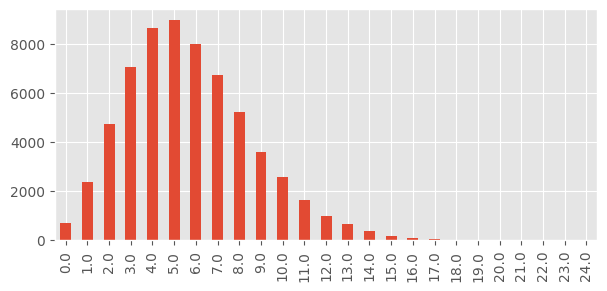

In [9]:
# show distribution of HC
df['HC'].value_counts().sort_index().plot(kind='bar', figsize=(7, 3))

Positively skewed, not normally distributed. Test for confirmation.
Shapiro_Wilk test to show extent of normality

In [10]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df['HC'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value},")

# Check if the p-value is less than the significance level (commonly 0.05)
# if less than 5% we reject the null hypothesis that the data follows a normal distribution

if p_value < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9637942314147949
P-value: 0.0,
The data does not follow a normal distribution.


C:\Users\MikeD\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Is the data poisson distributed? Compare with a poisson PMF

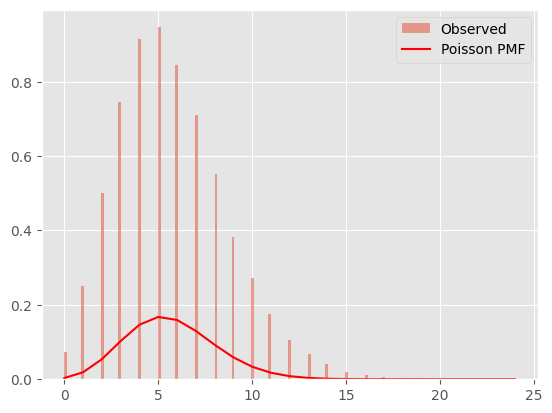

In [12]:
from scipy.stats import poisson

data = df['HC']
mu = data.mean()

plt.hist(data, bins='auto', density=True, alpha=0.5, label='Observed')
x = np.arange(0, max(data) + 1)
plt.plot(x, poisson.pmf(x, mu), 'r-', label='Poisson PMF')
plt.legend()
plt.show()

- Q-Q Plot Test for Poisson

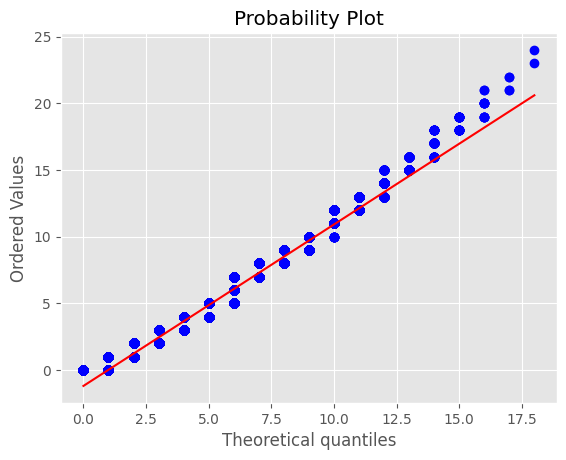

In [13]:
from scipy.stats import probplot

probplot(data, dist='poisson', sparams=(mu,), plot=plt)
plt.show()

The deviation observed in the Q-Q plot, where the points diverge from the straight line towards the right extreme, may indicate that the tail of the data distribution is heavier than what a Poisson distribution would predict. This suggests the presence of overdispersion, which occurs when the observed variability in the data is greater than what is expected from a Poisson distribution.

In the context of count data, overdispersion can often be addressed by considering alternative probability distributions that allow for greater variability. One such distribution is the Negative Binomial distribution, which is an extension of the Poisson distribution with an additional parameter to account for overdispersion.

- Chi-Sq Test for Poisson

In [58]:
from scipy.stats import poisson, chisquare

data = df['HC']

# Specify the expected Poisson distribution based on your data
expected_counts = np.histogram(data, bins='auto')[0]

# Perform the chi-squared goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=expected_counts)

# Check the p-value to determine the result of the test
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Data does not follow a Poisson distribution.")
else:
    print("Fail to reject the null hypothesis: Data follows a Poisson distribution.")

print("p_value:", round(p_value,4))

Reject the null hypothesis: Data does not follow a Poisson distribution.
p_value: 0.0


- Test for Negative Binomial

In [61]:
from scipy.stats import nbinom, poisson, chi2
from scipy.optimize import minimize

data = df['HC']

# Define the negative log-likelihood function for Poisson distribution
def neg_log_likelihood_poisson(params, data):
    mu = params[0]
    return -poisson.logpmf(data, mu).sum()

# Define the negative log-likelihood function for Negative Binomial distribution
def neg_log_likelihood_nbinom(params, data):
    r, p = params
    return -nbinom.logpmf(data, r, p).sum()

# Initial guesses for parameters
initial_params_poisson = [data.mean()]
initial_params_nbinom = [1, 0.5]

# Fit Poisson and Negative Binomial distributions
poisson_params = minimize(neg_log_likelihood_poisson, initial_params_poisson, args=(data,), method='L-BFGS-B').x
nbinom_params = minimize(neg_log_likelihood_nbinom, initial_params_nbinom, args=(data,), method='L-BFGS-B').x

# Calculate the log-likelihoods for both distributions
poisson_ll = -neg_log_likelihood_poisson(poisson_params, data)
nbinom_ll = -neg_log_likelihood_nbinom(nbinom_params, data)

# Calculate the likelihood ratio test statistic
lrt_statistic = -2 * (poisson_ll - nbinom_ll)

# Degrees of freedom is the difference in the number of parameters between the models
df_degrees_of_freedom = len(nbinom_params) - len(poisson_params)

# Print information about the data and test
print("Likelihood Ratio Test Statistic:", lrt_statistic)
print("Degrees of Freedom:", df_degrees_of_freedom)

# Calculate the p-value using the chi2 distribution
p_value = chi2.sf(lrt_statistic, df_degrees_of_freedom)

# Check the p-value to determine the result of the test
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Negative Binomial is a better fit than Poisson.")
else:
    print("Fail to reject the null hypothesis: Poisson is a sufficient model.")


Likelihood Ratio Test Statistic: -269507.8724246636
Degrees of Freedom: 1
Fail to reject the null hypothesis: Poisson is a sufficient model.


Proceed with assumption that Poisson is an adequate representation of our corners distribution

#### Observe best correlated features with home corners

In [16]:
df.corr()['HC'].sort_values()

AW_%              -0.270809
AG_Exp            -0.254435
AC                -0.199175
X_%               -0.116371
Un2.5_%           -0.081020
AwayT_AC_Run_Av   -0.066462
AwayT_HC_Run_Av   -0.064477
FTAG              -0.021117
TG                -0.015435
FTHG              -0.001283
AC_Lg_Run_Av       0.067273
Proj_AC            0.075546
Exp                0.080877
Ov2.5_%            0.081022
Proj_HC            0.100526
HomeT_AC_Run_Av    0.144858
HomeT_HC_Run_Av    0.147546
HC_Lg_Run_Av       0.151581
HG_Exp             0.265147
Sup_scld_2.7       0.266303
Sup Exp            0.274574
HW_%               0.275450
HC                 1.000000
Name: HC, dtype: float64

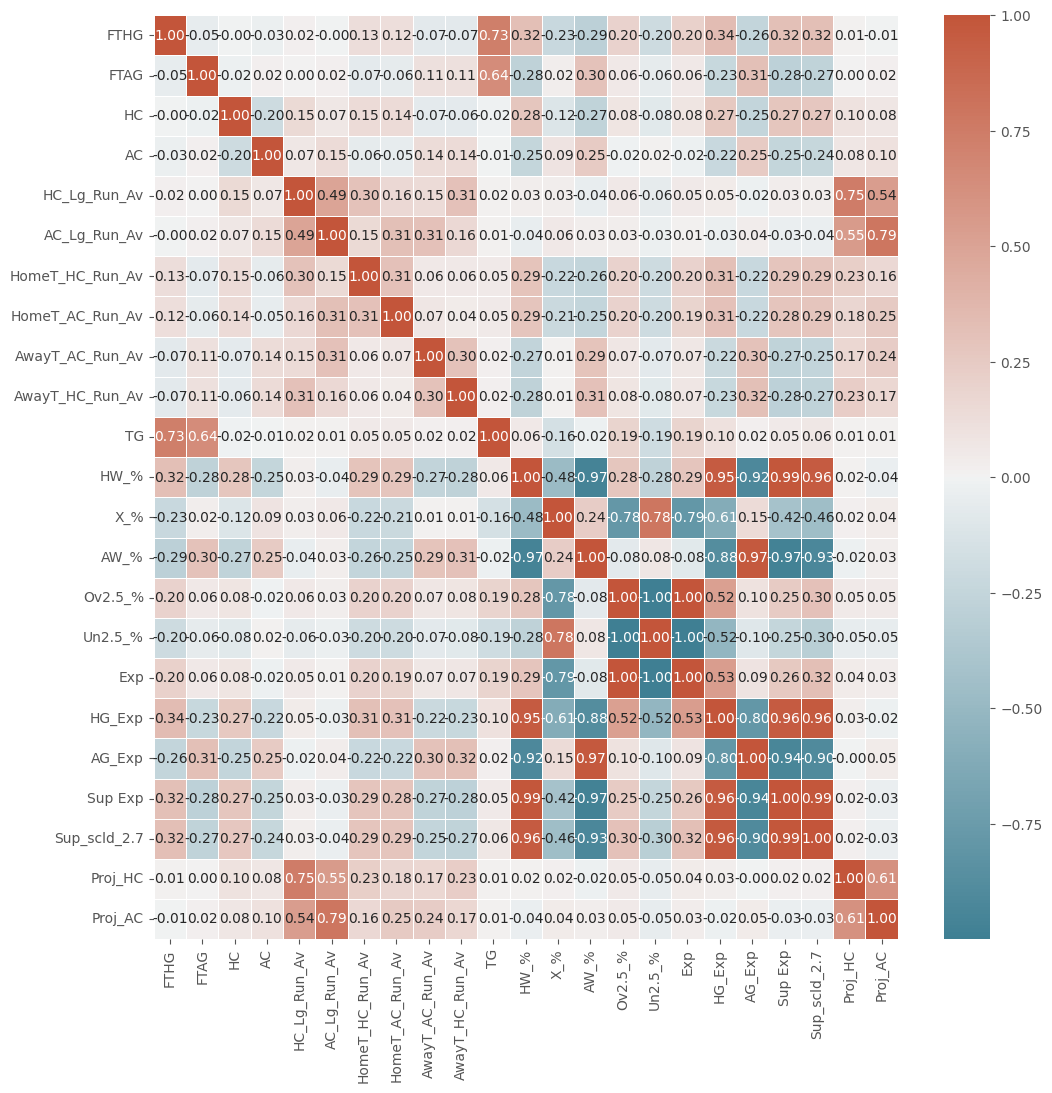

In [18]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

#### Feature Selection
 - Select features based on correlation to HC and not being correlated with each other
 - Keep: HG_Exp, AG_Exp, HomeT_HC_Run_Av, AwayT_AC_Run_Av, HC_Lg_Run_Av.
 - Check distributions of the selected features

<AxesSubplot:ylabel='Frequency'>

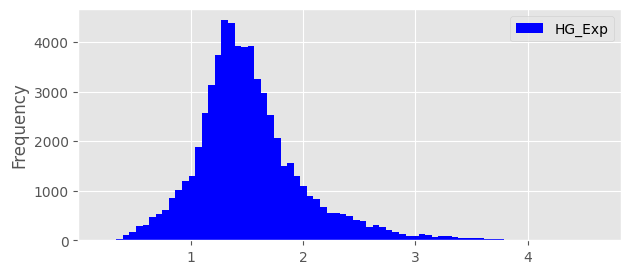

In [66]:
df.plot(kind='hist', y='HG_Exp', bins=75,figsize=(7,3), color = 'blue')

<AxesSubplot:ylabel='Frequency'>

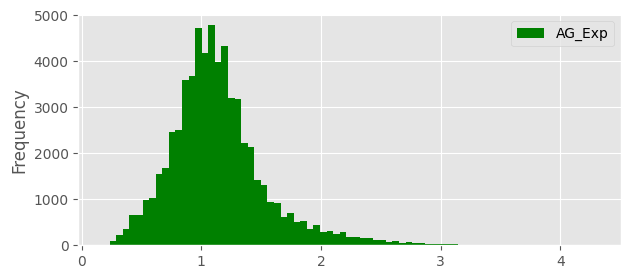

In [67]:
df.plot(kind='hist', y='AG_Exp', bins=75,figsize=(7,3), color='green')

<AxesSubplot:ylabel='Frequency'>

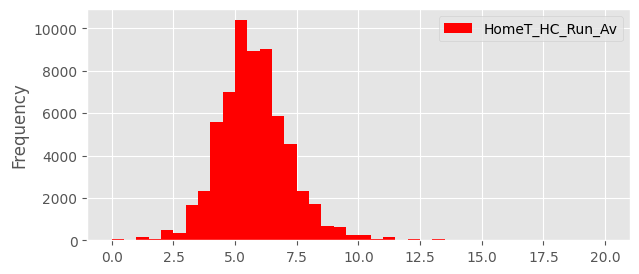

In [68]:
df.plot(kind='hist', y='HomeT_HC_Run_Av', bins=40,figsize=(7,3), color='red')

<AxesSubplot:ylabel='Frequency'>

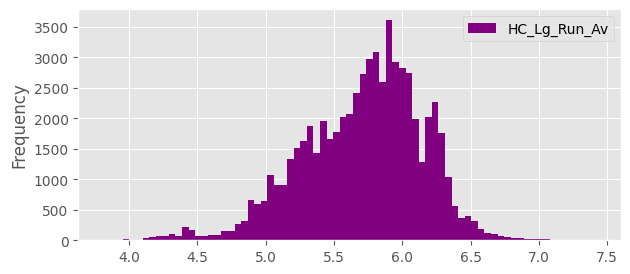

In [69]:
df.plot(kind='hist', y='HC_Lg_Run_Av', bins=75,figsize=(7,3), color='purple')

##### Above chart with slight negative skew - possibly due to using running league average corners despite removing first n matches in pre-processing. Using previous season/s average/s could be better alternative.


#### Plot selected features versus HC to show relationship

<AxesSubplot:xlabel='Sup_scld_2.7', ylabel='HC'>

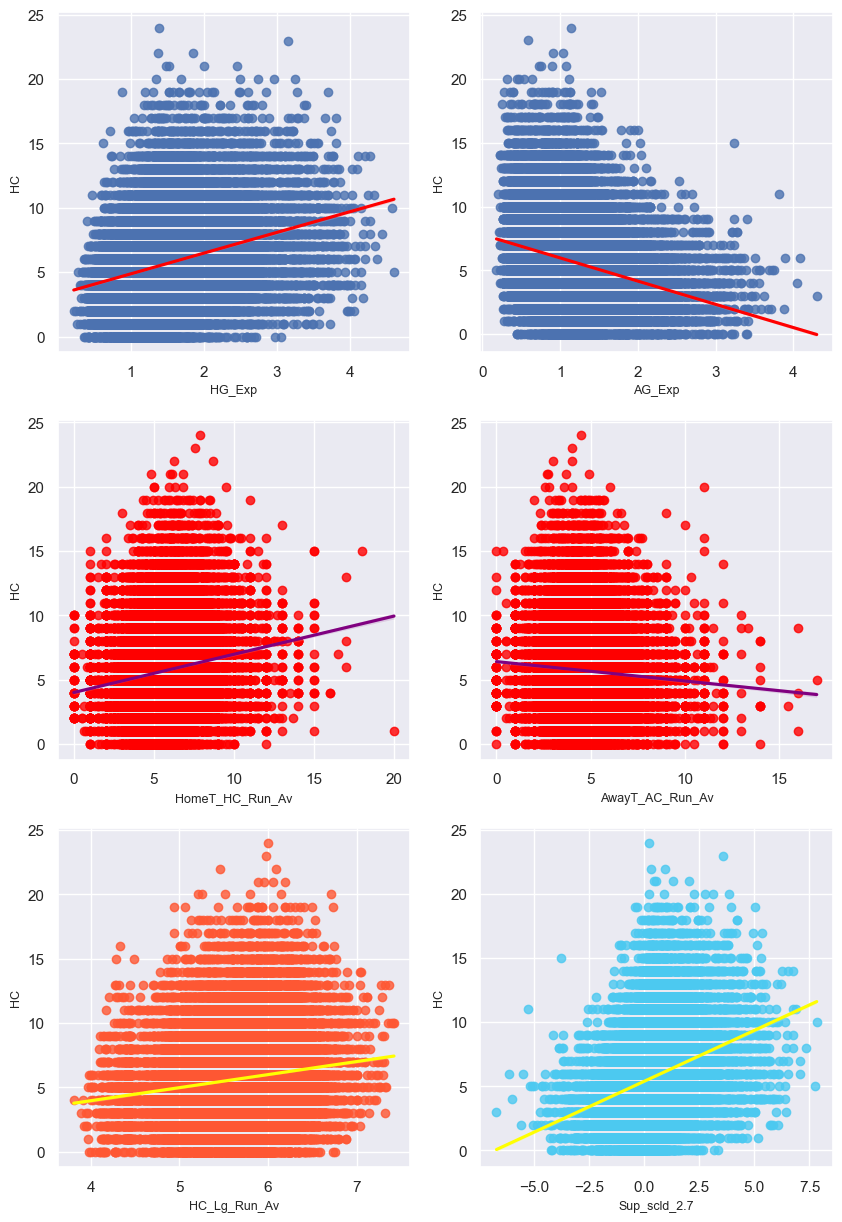

In [70]:
sns.set(rc = {'figure.figsize':(10,15), # width,length
              'axes.labelsize':9})
fig,axes = plt.subplots(3,2)

sns.regplot(data=df, x='HG_Exp', y='HC', ax=axes[0,0], line_kws={'color':'red'})
sns.regplot(data=df, x='AG_Exp', y='HC', ax=axes[0,1], line_kws={'color':'red'})
sns.regplot(data=df, x='HomeT_HC_Run_Av', y='HC', ax=axes[1,0], scatter_kws={'color': (1, 0, 0)}, line_kws={'color':'purple'})
sns.regplot(data=df, x='AwayT_AC_Run_Av', y='HC', ax=axes[1,1], scatter_kws={'color': (1, 0, 0)}, line_kws={'color':'purple'})
sns.regplot(data=df, x='HC_Lg_Run_Av', y='HC', ax=axes[2,0], scatter_kws={'color': '#FF5733'}, line_kws={'color':'yellow'})
sns.regplot(data=df, x='Sup_scld_2.7', y='HC', ax=axes[2,1], scatter_kws={'color': '#4CC9F0'}, line_kws={'color':'yellow'})


#### Correlated features vs HC using binned data to better observe relationship

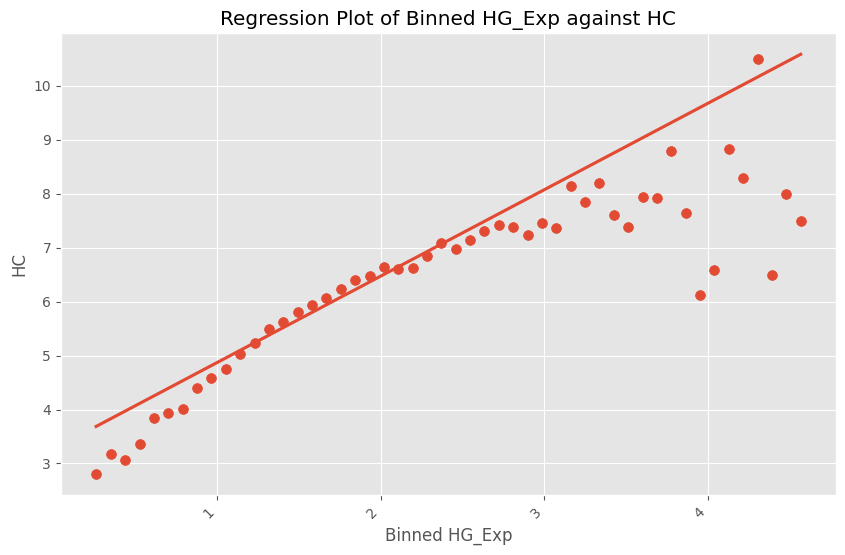

In [19]:
# create new df
data = df[['HG_Exp', 'HC']]

# Specify the number of bins
num_bins = 50

# Create a new column with binned values
df['HG_Exp_bins'] = pd.cut(df['HG_Exp'], bins=num_bins)

# Calculate the midpoint of each bin
bin_midpoints = df['HG_Exp_bins'].apply(lambda x: x.mid).astype(float)

# Create a regression plot with binned values
plt.figure(figsize=(10, 6))
sns.regplot(x=bin_midpoints, y='HC', data=df, x_estimator=np.mean, ci=None)

# Add labels and title
plt.xlabel('Binned HG_Exp')
plt.ylabel('HC')
plt.title('Regression Plot of Binned HG_Exp against HC')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

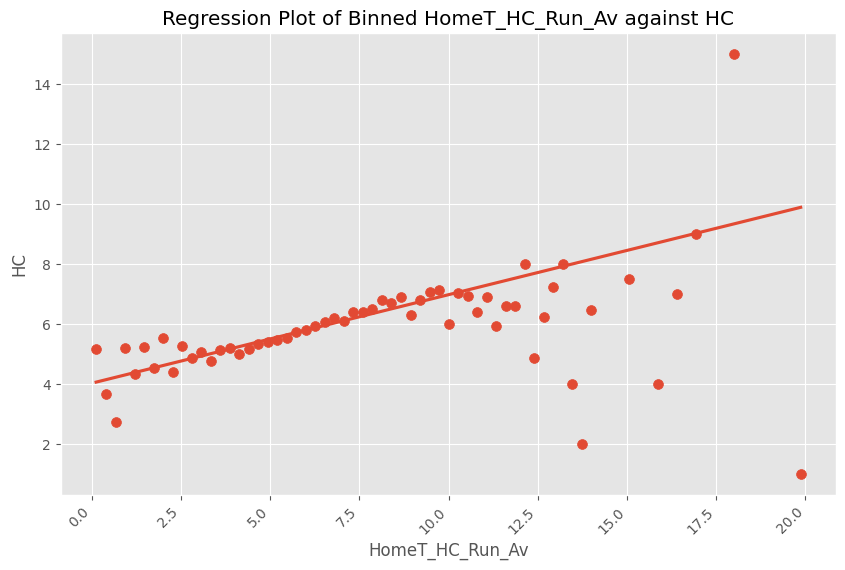

In [20]:
data = df[['HomeT_HC_Run_Av', 'HC']]

# Specify the number of bins
num_bins = 75

# Create a new column with binned values
df['HomeT_HC_Run_Av_bins'] = pd.cut(df['HomeT_HC_Run_Av'], bins=num_bins)

# Calculate the midpoint of each bin
bin_midpoints = df['HomeT_HC_Run_Av_bins'].apply(lambda x: x.mid).astype(float)

# Create a regression plot with binned values
plt.figure(figsize=(10, 6))
sns.regplot(x=bin_midpoints, y='HC', data=df, x_estimator=np.mean, ci=None)

# Add labels and title
plt.xlabel('HomeT_HC_Run_Av')
plt.ylabel('HC')
plt.title('Regression Plot of Binned HomeT_HC_Run_Av against HC')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### Polynomial fit for HC vs Binned_HG_Exp

In [21]:
# New df and bin the HG_Exp

df_hgx_hc = df[['HC', 'HG_Exp']]

bin_width = 0.05
min_value = 0
max_value = 3.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_hgx_hc['HG_Exp_Bin'] = pd.cut(df_hgx_hc['HG_Exp'], bins=bins, labels=labels, right=False, ordered=False)

# Ensure that 'HG_Exp_Bin' is converted to float for later use
df_hgx_hc['HG_Exp_Bin'] = df_hgx_hc['HG_Exp_Bin'].astype('float')

# Use groupby without resetting the index to avoid potential issues
group_df_hgx_hc = df_hgx_hc.groupby('HG_Exp_Bin', as_index=False)['HC'].mean()

# Use groupby without resetting the index to avoid potential issues
group_df_hgx_hc = df_hgx_hc.groupby('HG_Exp_Bin', as_index=False)['HC'].mean()

         2
-0.4456 x + 3.246 x + 1.846


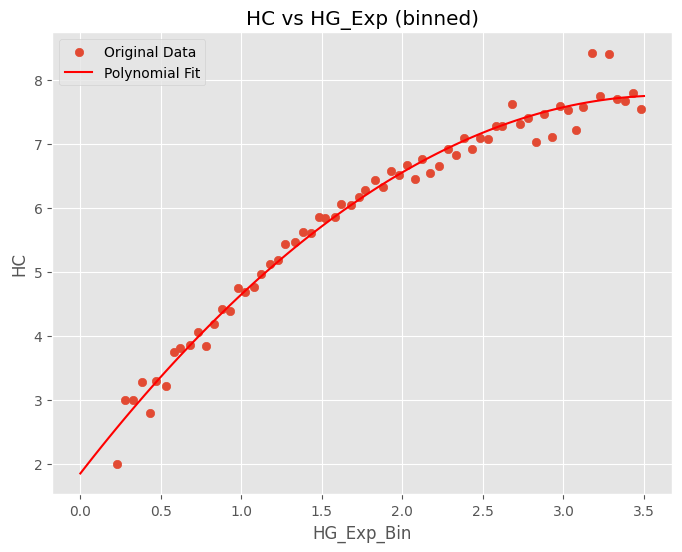

In [22]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0, 3.5, 80)
    y_new = model(x_new)

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Scatter plot of the original data points
    plt.scatter(ind_var, dep_var, label='Original Data')

    # Plot the polynomial trendline
    plt.plot(x_new, y_new, label='Polynomial Fit', color='red')

    plt.title('HC vs HG_Exp (binned)')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('HC')
    plt.legend()  # Show legend with labels

    plt.show()
    plt.close()
    
# Example usage
x = group_df_hgx_hc['HG_Exp_Bin']
y = group_df_hgx_hc['HC']

# declare poly degree
degree = 2

f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function
PlotPolly(p, x, y, 'HG_Exp_Bin')

Relationships are all curved with clear polynomial trends

# _________________________________________________________________________________

#### Model the data with Poisson Regression

- Split data into Train and Test groups and apply poisson regression, testing different combinations of features
- Compare Pseudo R2 values as metric to determine best features combination
#### Train_1

In [59]:
import statsmodels.api as sm
import statsmodels.tools as sm_tools

#Split data separating the independent and target variables
y_data = df['HC']
X_data = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'HC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data = sm.add_constant(X_data)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0)

y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

print('number of test samples :', X_test.shape[0])
print('number of training samples :', X_train.shape[0])

number of test samples : 12538
number of training samples : 50148


In [61]:
#import statsmodels.api as sm
#from sklearn.model_selection import train_test_split

# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model.summary())

# Assess the model on the test set
y_pred_test = poisson_model.predict(X_test)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HC   No. Observations:                50148
Model:                            GLM   Df Residuals:                    50142
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2175e+05
Date:                Mon, 22 Jan 2024   Deviance:                       70535.
Time:                        09:25:31   Pearson chi2:                 6.82e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1376
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8284      0.030     

The Pseudo R-squared (0.138) suggests that the model explains approximately 13.8% of the variance in the data. 

Example prediction:

In [106]:
import statsmodels.tools as sm_tools

# Input values
HG = 3.3
AG = 0.4
H_Av = 7
A_Av = 3.5
Lg_Av_HC = 4.6

# Create a DataFrame with the input values
x_new = pd.DataFrame({'const':1, 'HG_Exp': [HG], 'AG_Exp': [AG], 'HomeT_HC_Run_Av': [H_Av], 'AwayT_AC_Run_Av': [A_Av], 'HC_Lg_Run_Av': [Lg_Av_HC]})

# Use the trained model to make predictions on the new data
predicted_HC = poisson_model.predict(x_new)

print('Predicted HC:', predicted_HC)

Predicted HC: 0    6.902828
dtype: float64


## _________________________________________________________________________________________________

#### Train_2

In [29]:
# y_data_2 = df['HC']
# X_data_2 = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']]

In [30]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_2, y_data_2, test_size=0.2, random_state=8)

# y_train = y_train.reset_index(drop=True)
# X_train = X_train.reset_index(drop=True)

# poisson_model_2 = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# # Display the summary of the model
# print(poisson_model_2.summary())

# # Assess the model on the test set
# y_pred_test = poisson_model_2.predict(X_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HC   No. Observations:                50148
Model:                            GLM   Df Residuals:                    50144
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2220e+05
Date:                Mon, 22 Jan 2024   Deviance:                       71372.
Time:                        08:50:46   Pearson chi2:                 6.96e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1261
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
HG_Exp              0.2051      0.005     

Slight reduction in Pseudo R2 at 0.126

Example Prediction:

In [74]:
# #import statsmodels.tools as sm_tools

# # Input values
# HG = 3.1
# AG = 0.7
# H_Av = 6
# A_Av = 3.5
# Lg_Av_HC = 5

# # Create a DataFrame with the input values
# x_new = pd.DataFrame({'HG_Exp': [HG], 'AG_Exp': [AG], 'HomeT_HC_Run_Av': [H_Av], 'HC_Lg_Run_Av': [Lg_Av_HC]})

# # # Add a constant term to the new data frame
# # x_new_with_const = sm_tools.add_constant(x_new)

# # Use the trained model to make predictions on the new data
# predicted_HC = poisson_model_2.predict(x_new)

# print('Predicted HC:', predicted_HC)

Predicted HC: 0    6.690222
dtype: float64


# _______________________________________________________________________________________________

#### Repeat for AC using same features

In [48]:
df.corr()['AC'].sort_values()

HW_%              -0.245982
Sup Exp           -0.245511
Sup_scld_2.7      -0.236851
HG_Exp            -0.221378
HC                -0.199175
HomeT_HC_Run_Av   -0.057079
HomeT_AC_Run_Av   -0.054502
FTHG              -0.028257
Exp               -0.020348
Ov2.5_%           -0.015377
TG                -0.006513
Un2.5_%            0.015378
FTAG               0.022153
HC_Lg_Run_Av       0.065661
Proj_HC            0.076389
X_%                0.086150
Proj_AC            0.102786
AwayT_AC_Run_Av    0.137804
AwayT_HC_Run_Av    0.142600
AC_Lg_Run_Av       0.145522
AG_Exp             0.245996
AW_%               0.246795
AC                 1.000000
Name: AC, dtype: float64

<AxesSubplot:>

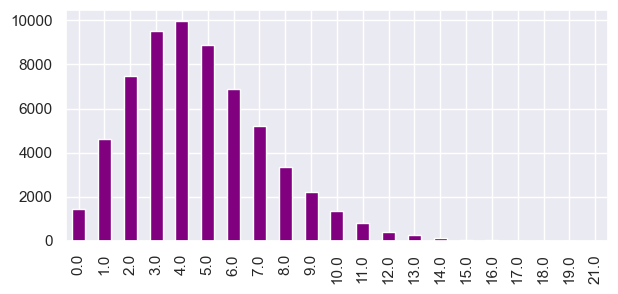

In [163]:
# show distribution of AC
df['AC'].value_counts().sort_index().plot(kind='bar', color='purple',figsize=(7, 3))

#### Visualize relationship between AC and AG_Exp using binned data and polynomial trend

In [72]:
# New df and bin the HG_Exp

df_agx_ac = df[['AC', 'AG_Exp']]

bin_width = 0.07
min_value = 0
max_value = 3.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_agx_ac['AG_Exp_Bin'] = pd.cut(df_agx_ac['AG_Exp'], bins=bins, labels=labels, right=False, ordered=False)

# Ensure that 'AG_Exp_Bin' is converted to float 
df_agx_ac['AG_Exp_Bin'] = df_agx_ac['AG_Exp_Bin'].astype('float')

# Use groupby without resetting the index to avoid potential issues
group_df_agx_ac = df_agx_ac.groupby('AG_Exp_Bin', as_index=False)['AC'].mean()

# Use groupby without resetting the index to avoid potential issues
group_df_agx_ac = df_agx_ac.groupby('AG_Exp_Bin', as_index=False)['AC'].mean()

         2
-0.2928 x + 2.454 x + 2.147


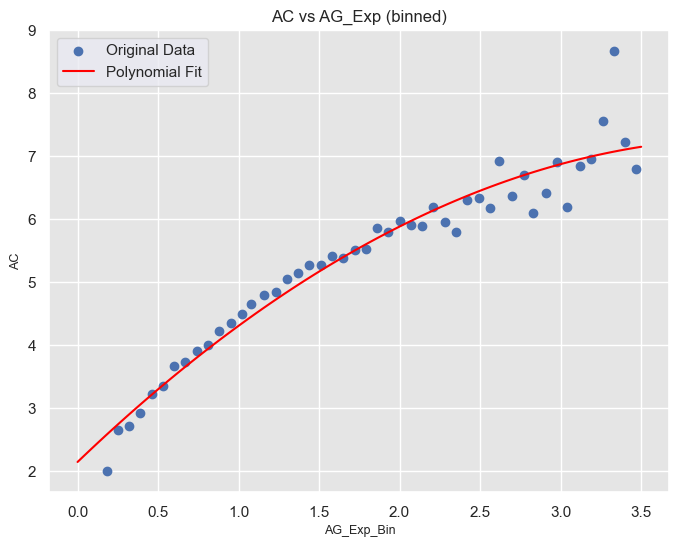

In [74]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0, 3.5, 80)
    y_new = model(x_new)

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Scatter plot of the original data points
    plt.scatter(ind_var, dep_var, label='Original Data')

    # Plot the polynomial trendline
    plt.plot(x_new, y_new, label='Polynomial Fit', color='red')

    plt.title('AC vs AG_Exp (binned)')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('AC')
    plt.legend()  # Show legend with labels

    plt.show()
    plt.close()
    
# Example usage
x = group_df_agx_ac['AG_Exp_Bin']
y = group_df_agx_ac['AC']

# declare poly degree
degree = 2

f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function
PlotPolly(p, x, y, 'AG_Exp_Bin')

#### Model AC with Poisson Regression (best performing model) using reversed features selected for HC - using all the data

In [52]:
y_data_A = df['AC']
X_data_A = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av']]

# Add a constant term to the design matrix
X_data_A = sm.add_constant(X_data_A)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data_A, y_data_A, test_size=0.20, random_state=0)

y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

print('number of test samples :', X_test.shape[0])
print('number of training samples :', X_train.shape[0])

number of test samples : 12538
number of training samples : 50148


In [54]:
#import statsmodels.api as sm
#from sklearn.model_selection import train_test_split

# Fit the Poisson regression model on the training data
# The sm.GLM class from statsmodels is used for generalized linear models, and we specify family=sm.families.Poisson() to indicate that we want a Poisson regression.
poisson_model_A = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display the summary of the model
print(poisson_model_A.summary())

# Assess the model on the test set
y_pred_test = poisson_model_A.predict(X_test)



                 Generalized Linear Model Regression Results                  
Dep. Variable:                     AC   No. Observations:                50148
Model:                            GLM   Df Residuals:                    50142
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1635e+05
Date:                Mon, 22 Jan 2024   Deviance:                       71791.
Time:                        09:22:27   Pearson chi2:                 6.89e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1125
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5496      0.032     

In [110]:
#import statsmodels.tools as sm_tools

# Input values
HG = 3.3
AG = 0.4
H_Av = 7
A_Av = 3.5
Lg_Av_AC = 4

# Create a DataFrame with the input values
x_new_A = pd.DataFrame({'const':1, 'HG_Exp': [HG], 'AG_Exp': [AG], 'HomeT_HC_Run_Av': [H_Av], 'AwayT_AC_Run_Av': [A_Av], 'AC_Lg_Run_Av': [Lg_Av_AC]})

# Use the trained model to make predictions on the new data
predicted_AC = poisson_model_A.predict(x_new_A)

print('Predicted AC:', predicted_AC)

Predicted AC: 0    2.7853
dtype: float64
